### Artificial Neural Network --- Churn Modelling 

We have to create a neural network model which will predict whether the cutomer in bank will take an exit or not in future

In [1]:
### Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Import Dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
dataset.shape

(10000, 14)

In [3]:
### Remove columns that we dont need in Training
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

X.shape,y.shape

((10000, 10), (10000,))

In [6]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [7]:
### Creating Dummy varaibles

geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

### Concat Dummy columns to X
X = pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [8]:
### Drop Object columns 
X = X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [9]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [10]:
### Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [12]:
type(X_train)

numpy.ndarray

--------------

#### Artificial Neural Network --- ANN

In [16]:
### Import Keras libraries and packages

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout 

#### Initializing ANN Architecture --- Sequential

In [20]:
classifier = Sequential()

#### Adding Input Layer and first Hidden Layer 

Weight Initialization Techiniques

1. Uniform Distribution  : It works really well with Sigmoid Activation Function
2. Xavier/Gorat Distribution w.r.t Uniform and Normal : It works really well with Sigmoid Activation Function
3. HE w.r.t Uniform and Normal : It works really well with RELU Activation function

In [21]:
### output_dimension or units-- Number of neurons in First Hidden layer
### init or kernel_initializer
### input_dimension  -- Number of neurons for inputs i-e Features
classifier.add(Dense(units=6,kernel_initializer= 'he_uniform',activation='relu',input_dim=11))

### 11 inputs neurons in Input layer , 6 neurons in Hidden layer

#### Second Hidden layer

In [22]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

#### Output layer

In [23]:
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

#### Summary of your ANN 

In [25]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


#### Compile ANN ---- Loss Function,Optimizer,Metrics

In [26]:
classifier.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### Fit compiled ANN to the Training set

Training will be done as per Batch Size and Iterations 

In [27]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,nb_epoch=100)

Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 34s 6ms/sample - loss: 0.6201 - acc: 0.6988 - val_loss: 0.5136 - val_acc: 0.7864
Epoch 2/100
5359/5359 [==============================] - 4s 684us/sample - loss: 0.4690 - acc: 0.8001 - val_loss: 0.4482 - val_acc: 0.8046
Epoch 3/100
5359/5359 [==============================] - 3s 599us/sample - loss: 0.4188 - acc: 0.8179 - val_loss: 0.4193 - val_acc: 0.8254
Epoch 4/100
5359/5359 [==============================] - 3s 649us/sample - loss: 0.3889 - acc: 0.8399 - val_loss: 0.3989 - val_acc: 0.8353
Epoch 5/100
5359/5359 [==============================] - 3s 579us/sample - loss: 0.3709 - acc: 0.8487 - val_loss: 0.3871 - val_acc: 0.8372
Epoch 6/100
5359/5359 [==============================] - 3s 613us/sample - loss: 0.3597 - acc: 0.8515 - val_loss: 0.3813 - val_acc: 0.8376
Epoch 7/100
5359/5359 [==============================] - 3s 607us/sample - loss: 0.3531 - acc: 0.8561 - val_loss: 0.378

Epoch 59/100
5359/5359 [==============================] - 4s 685us/sample - loss: 0.3276 - acc: 0.8640 - val_loss: 0.3561 - val_acc: 0.8557
Epoch 60/100
5359/5359 [==============================] - 4s 735us/sample - loss: 0.3277 - acc: 0.8643 - val_loss: 0.3565 - val_acc: 0.8573
Epoch 61/100
5359/5359 [==============================] - 4s 715us/sample - loss: 0.3277 - acc: 0.8645 - val_loss: 0.3570 - val_acc: 0.8573
Epoch 62/100
5359/5359 [==============================] - 4s 732us/sample - loss: 0.3279 - acc: 0.8643 - val_loss: 0.3563 - val_acc: 0.8557
Epoch 63/100
5359/5359 [==============================] - 3s 651us/sample - loss: 0.3272 - acc: 0.8645 - val_loss: 0.3575 - val_acc: 0.8569
Epoch 64/100
5359/5359 [==============================] - 4s 667us/sample - loss: 0.3268 - acc: 0.8670 - val_loss: 0.3559 - val_acc: 0.8565
Epoch 65/100
5359/5359 [==============================] - 4s 760us/sample - loss: 0.3276 - acc: 0.8670 - val_loss: 0.3563 - val_acc: 0.8557
Epoch 66/100
5359/53

#### Predicting Test Result Set

In [28]:
y_pred = classifier.predict(X_test)
y_pred

array([[0.32855165],
       [0.3037234 ],
       [0.09752628],
       ...,
       [0.17023036],
       [0.14256904],
       [0.20857823]], dtype=float32)

In [29]:
y_pred = (y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

#### Evaluating Test Results

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8625
[[1527   68]
 [ 207  198]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.74      0.49      0.59       405

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



-------

#### Adding Dropout layer  ----- Apply Dropout for Very deep neural network

In [32]:
classifier = Sequential()
classifier.add(Dense(units=6,kernel_initializer= 'he_uniform',activation='relu',input_dim=11))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [33]:
classifier.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,nb_epoch=100)

Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 8s 2ms/sample - loss: 0.6356 - acc: 0.7610 - val_loss: 0.5330 - val_acc: 0.7955
Epoch 2/100
5359/5359 [==============================] - 4s 742us/sample - loss: 0.5417 - acc: 0.7960 - val_loss: 0.4976 - val_acc: 0.7955
Epoch 3/100
5359/5359 [==============================] - 3s 607us/sample - loss: 0.5131 - acc: 0.7972 - val_loss: 0.4824 - val_acc: 0.7955
Epoch 4/100
5359/5359 [==============================] - 3s 588us/sample - loss: 0.4960 - acc: 0.7975 - val_loss: 0.4717 - val_acc: 0.7955
Epoch 5/100
5359/5359 [==============================] - 3s 631us/sample - loss: 0.4884 - acc: 0.7992 - val_loss: 0.4636 - val_acc: 0.7963
Epoch 6/100
5359/5359 [==============================] - 3s 652us/sample - loss: 0.4807 - acc: 0.8003 - val_loss: 0.4577 - val_acc: 0.7970
Epoch 7/100
5359/5359 [==============================] - 4s 655us/sample - loss: 0.4735 - acc: 0.8016 - val_loss: 0.4512

Epoch 59/100
5359/5359 [==============================] - 5s 861us/sample - loss: 0.4182 - acc: 0.8222 - val_loss: 0.3860 - val_acc: 0.8281
Epoch 60/100
5359/5359 [==============================] - 4s 779us/sample - loss: 0.4187 - acc: 0.8231 - val_loss: 0.3903 - val_acc: 0.8201
Epoch 61/100
5359/5359 [==============================] - 4s 756us/sample - loss: 0.4274 - acc: 0.8190 - val_loss: 0.3916 - val_acc: 0.8190
Epoch 62/100
5359/5359 [==============================] - 3s 650us/sample - loss: 0.4248 - acc: 0.8184 - val_loss: 0.3874 - val_acc: 0.8273
Epoch 63/100
5359/5359 [==============================] - 3s 642us/sample - loss: 0.4221 - acc: 0.8190 - val_loss: 0.3881 - val_acc: 0.8262
Epoch 64/100
5359/5359 [==============================] - 4s 695us/sample - loss: 0.4242 - acc: 0.8238 - val_loss: 0.3875 - val_acc: 0.8273
Epoch 65/100
5359/5359 [==============================] - 4s 741us/sample - loss: 0.4186 - acc: 0.8242 - val_loss: 0.3867 - val_acc: 0.8262
Epoch 66/100
5359/53

In [36]:
print(model_history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


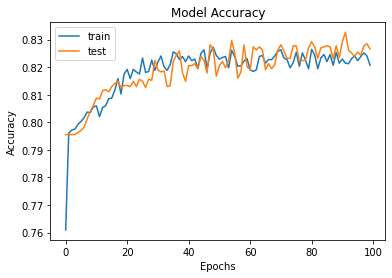

In [37]:
### History for accuracy

plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

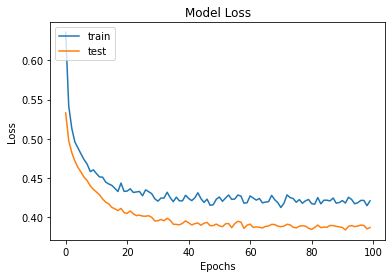

In [38]:
### History for Loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [39]:
y_pred = classifier.predict(X_test)
y_pred

array([[0.29293072],
       [0.28492603],
       [0.23044398],
       ...,
       [0.20967868],
       [0.17453215],
       [0.18269944]], dtype=float32)

In [40]:
y_pred = (y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8295
[[1588    7]
 [ 334   71]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      1595
           1       0.91      0.18      0.29       405

    accuracy                           0.83      2000
   macro avg       0.87      0.59      0.60      2000
weighted avg       0.84      0.83      0.78      2000

